Тимошешенко Володимир ПР6.2

Завантаження даних та пакетів

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

Завантаження та розділення даних

In [3]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data  
y = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Визначення важливих ознак з використанням SVM

In [4]:
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)
svm_feature_importance = np.abs(svm_model.coef_)[0]

Визначення важливих ознак з використанням Random Forest

In [5]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_feature_importance = rf_model.feature_importances_

Побудова графіка для важливості ознак

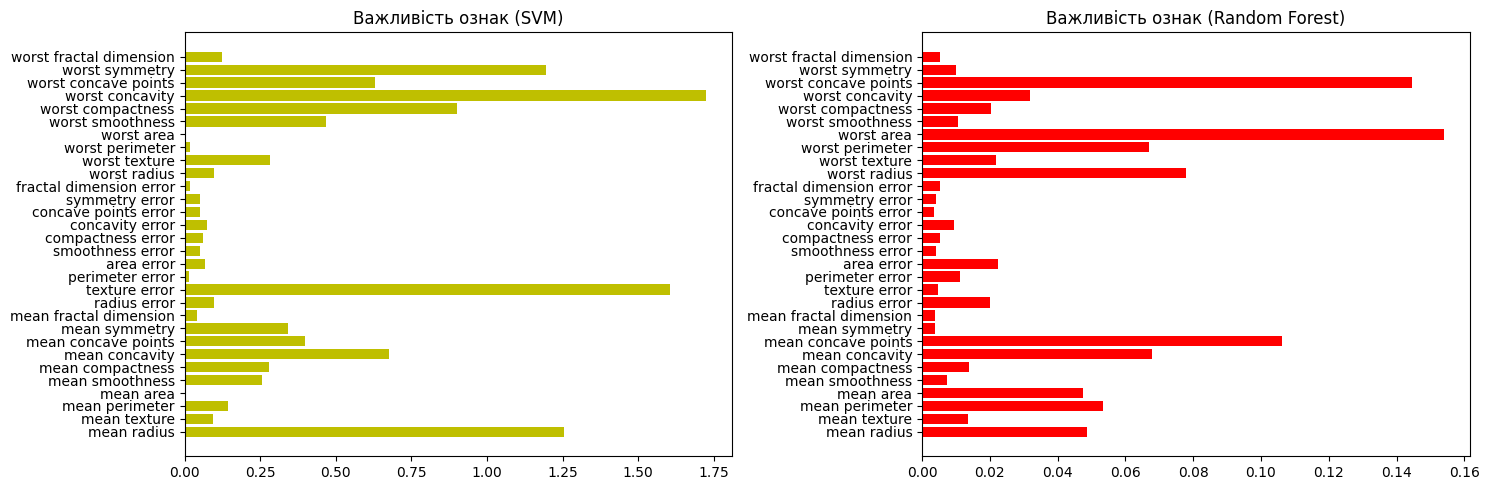

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].barh(range(len(svm_feature_importance)), svm_feature_importance, color='y')
ax[0].set_yticks(range(len(breast_cancer.feature_names)))
ax[0].set_yticklabels(breast_cancer.feature_names)
ax[0].set_title('Важливість ознак (SVM)')

ax[1].barh(range(len(rf_feature_importance)), rf_feature_importance, color='r')
ax[1].set_yticks(range(len(breast_cancer.feature_names)))
ax[1].set_yticklabels(breast_cancer.feature_names)
ax[1].set_title('Важливість ознак (Random Forest)')

plt.tight_layout()
plt.show()

Порівняння результатів

In [9]:
svm_accuracy = svm_model.score(X_test, y_test)
rf_accuracy = rf_model.score(X_test, y_test)
print("Точність моделі SVM:", svm_accuracy)
print("Точність моделі Random Forest:", rf_accuracy)

Точність моделі SVM: 0.956140350877193
Точність моделі Random Forest: 0.9649122807017544


Висновок:

Алгоритм Random Forest виявився більш точним. Це означає, що для подібних типів даних він є кращим вибором ніж SVM.